In [2]:
import scipy as sp
from scipy import stats, optimize, interpolate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

# 33절: 결합확률과 조건부확률

# 다변수 이산확률변수의 결합/조건부확률

## 다변수 이산확률변수

카테고리 값을 가질 수 있는 이산확률변수가 두 개 이상 있는 경우 확률분포 쌍이 가지는 복합적인 확률분포를 살펴보아야 한다.

$P_X(1)$ 

확률변수 X의 값이 1이 나올 확률 

## 결합 확률질량함수

두 개의 값, 즉 특정한 숫자 쌍이 나타나는 경우

하나의 숫자 쌍만을 가지는 사건,즉 아톰(atom) 사건에 대한 확률만 알고 있으면
임의의 숫자 쌍 집합 즉, 임의의 사건에 대해서도 확률을 계산할 수 있다. 

하나 하나의 숫자 쌍에 대해 확률을 알려주는 확률질량함수만 있으면 전체 확률분포를 알 수 있다. 이러한 확률질량함수를 결합 확률질량함수(joint probability mass function)이라고 한다.

$P_{XY}(x, y)$ 
두개의 숫자의 쌍 (독립변수) x,y, 종속변수는 그 숫자 쌍이 나타날 확률

동전을 3번 던지는 경우 앞앞앞, 앞앞뒤, 앞뒤뒤.. 

6개의 카테고리 값을 가지는 두 개의 이산확률변수의 확률질량함수 예

In [3]:
pmf = np.array([[1, 2, 1, 0, 0, 0],
                [0, 2, 3, 1, 0, 0],
                [0, 4, 6, 4, 1, 0],
                [0, 1, 4, 6, 4, 0],
                [0, 0, 1, 3, 2, 0],
                [0, 0, 0, 1, 2, 1]])
pmf = pmf/pmf.sum()
pmf

array([[ 0.02,  0.04,  0.02,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.04,  0.06,  0.02,  0.  ,  0.  ],
       [ 0.  ,  0.08,  0.12,  0.08,  0.02,  0.  ],
       [ 0.  ,  0.02,  0.08,  0.12,  0.08,  0.  ],
       [ 0.  ,  0.  ,  0.02,  0.06,  0.04,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.02,  0.04,  0.02]])

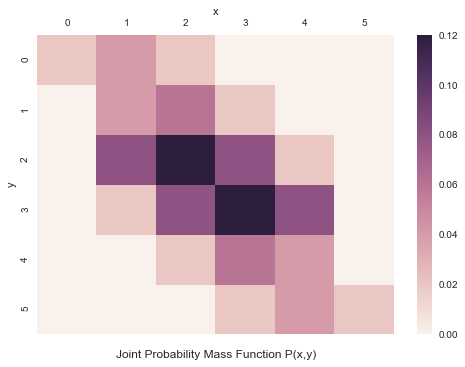

In [4]:
ax = sns.heatmap(pmf)
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Mass Function P(x,y)", y=-0.1)
plt.show()

## 주변 확률질량함수

두 확률변수 중 하나의 확률변수 값에 대해서만 확률분포를 표시한 함수 <br>
즉, 다변수가 되기 이전의 단변수 확률질량함수

결합 확률질량함수에서 주변 확률질량함수를 구하려면 <br>
전체 확률의 법칙에 의해 다른 변수가 가질 수 있는 모든 값의 결합확률질량함수를 합한 확률이 된다.

$\begin{align}%\label{}
\nonumber  P_X(x) = \sum_{y_i} f_{XY}(x,y_i) \\
\nonumber  P_Y(y) = \sum_{x_i} f_{XY}(x_i,y) \\
\end{align}$

In [5]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

array([ 0.02,  0.18,  0.3 ,  0.3 ,  0.18,  0.02])

array([[ 0.08],
       [ 0.12],
       [ 0.3 ],
       [ 0.3 ],
       [ 0.12],
       [ 0.08]])

## 조건부 확률질량함수

조건부 확률질량함수(conditional probability mass function)는 <br>
다변수 확률변수 중 하나의 값이 특정 값으로 고정되어 상수가 되어 버린 경우, <br> 
나머지 변수에 대한 확률질량함수를 말한다.

조건부 확률질량함수의 모양은 결합질량함수 PXY(x,y) 에서 y 값이 고정된 함수, 즉, 결합질량함수의 단면과 같아진다.

다만 조건부 확률질량함수의 합은 1이 된다.


# 다변수 연속확률변수의 결합/조건부확률

연속확률분포에서는 단변수 연속확률변수처럼 누적확률분포함수를 먼저 정의한 후 이를 미분하여 확률밀도함수를 정의하는 방법을 사용

## 결합 누적확률분포함수
$F_{XY}(x, y) = P(\{ X < x \} \cap \{ Y < y \}) = P(X < x, Y < y)$

구간의 끝을 나타내는 두 독립 변수 x, y 중 하나가 무한대 값을 가지는 경우 <br>
해당 변수의 값은 어떤 값을 가져도 상관없으므로 남은 하나의 변수에 대한 누적확률분포함수로 줄어든다. 이를 주변 누적확률분포(marginal cumulative probability distribution)이라고 한다.


## 결합 확률밀도함수


